In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from helpers import *

(62, 40, 3)


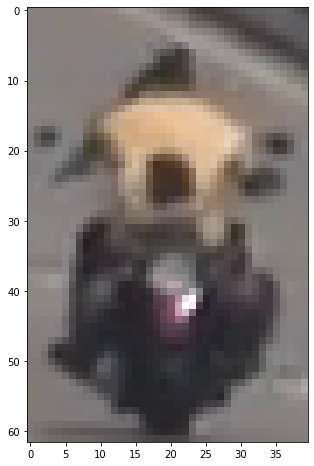

In [2]:
template_image = cv2.imread('../Data/biker.png')
template_image = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

print(template_image.shape)
plt.imshow(template_image)

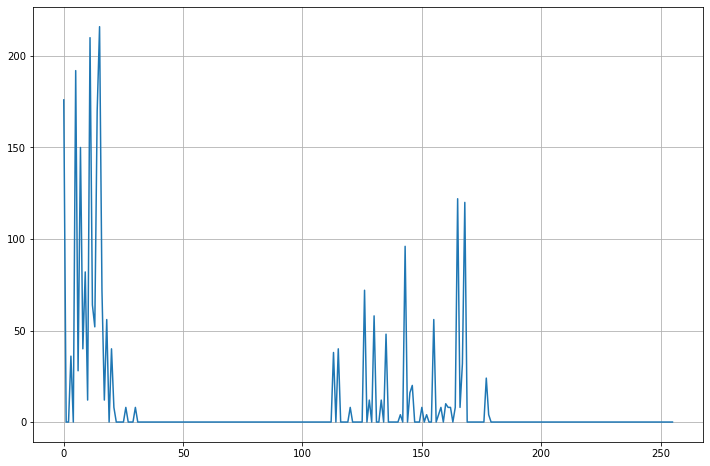

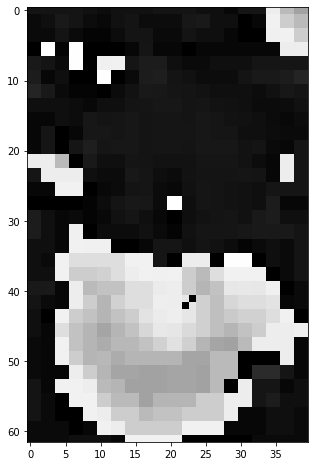

In [72]:
hsv_roi = cv2.cvtColor(template_image, cv2.COLOR_RGB2HSV)

CHANNEL_INDEX = 0

show_histograms(hsv_roi, channel_index=CHANNEL_INDEX)
plt.imshow(hsv_roi[:,:,CHANNEL_INDEX], cmap='gray')

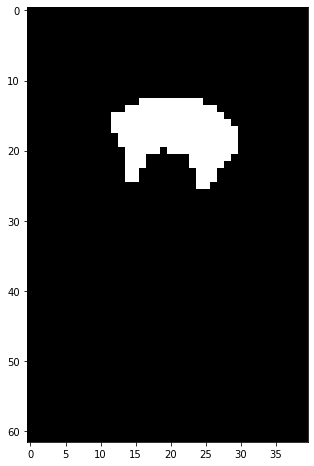

In [76]:
mask = cv2.inRange(hsv_roi, np.array([0., 50., 180.]), np.array([40., 150., 240.]))

plt.imshow(mask, cmap='gray')

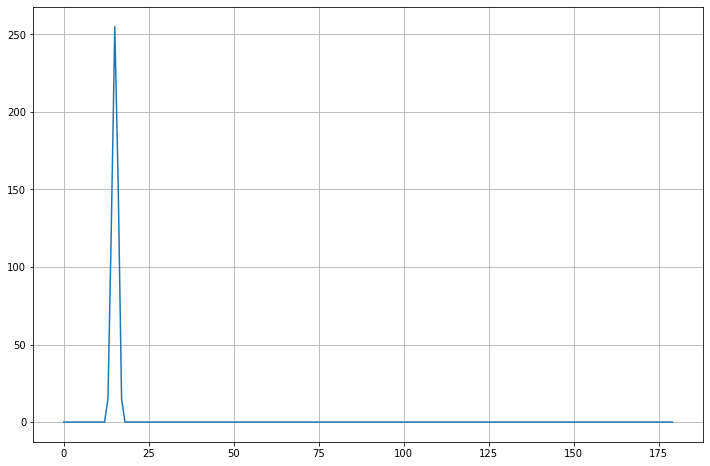

In [82]:
roi_hist = cv2.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv2.normalize(roi_hist, roi_hist, 0, 255 ,cv2.NORM_MINMAX)

plt.plot(roi_hist)
plt.grid()

In [3]:
frames = list()

cap = cv2.VideoCapture('../Data/slow_traffic_small.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    
    if not ret:
        break
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)

[ WARN:0@0.603] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_1659973604098/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@0.603] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_1659973604098/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin0 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@0.603] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_1659973604098/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@0.603] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_11bywz31rl/croots/recipe/opencv-suite_16599736

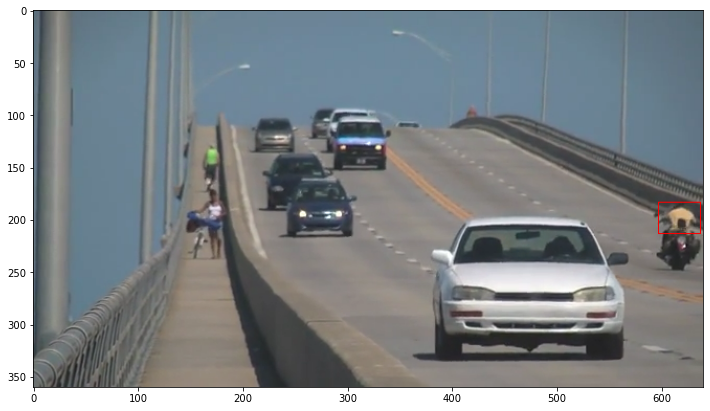

In [88]:
FRAME_ID = 114
X, Y, W, H = 597, 183, 40, 30

image = frames[FRAME_ID].copy()

image = cv2.rectangle(image, (X, Y), (X + W, Y + H), (255, 0, 0), 1)

plt.imshow(image)

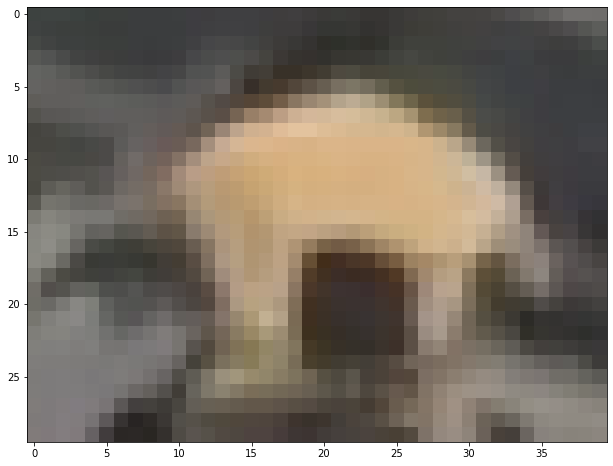

In [89]:
roi = frames[FRAME_ID][Y:Y+H, X:X+W]
plt.imshow(roi)

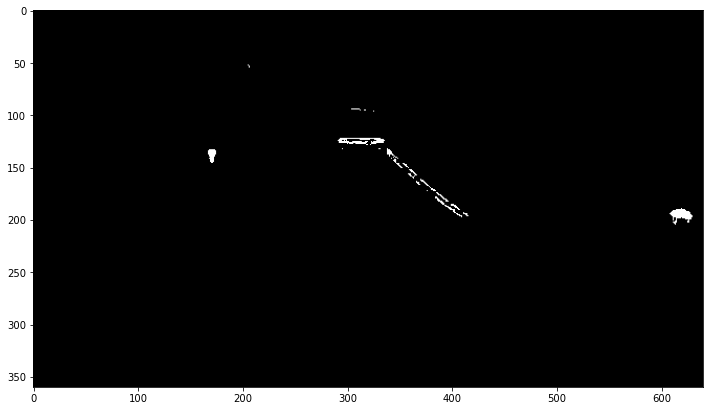

In [71]:
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
mask = cv2.inRange(hsv, np.array([0., 50., 180.]), np.array([255., 150., 240.]))

plt.imshow(mask, cmap='gray')

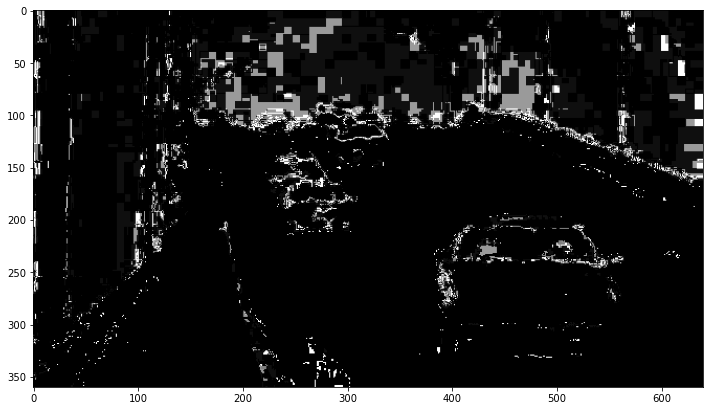

In [83]:
hsv = cv2.cvtColor(frames[FRAME_ID], cv2.COLOR_BGR2HSV)
backProjection = cv2.calcBackProject([hsv], [0], roi_hist, [0,180], 1)

plt.imshow(backProjection, cmap='gray')

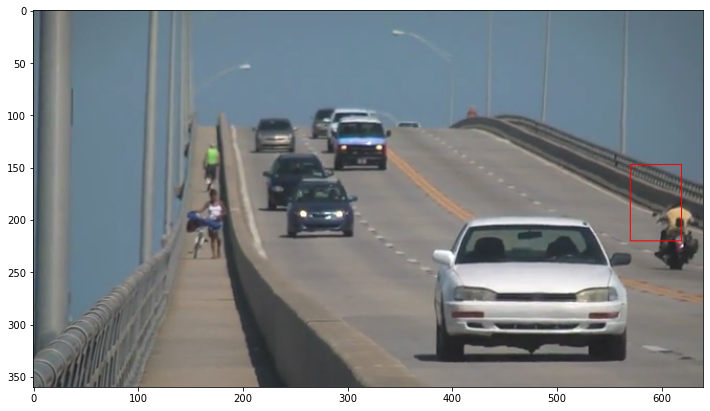

In [9]:
TERMINATION_CITERIA = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 1)

ret, track_window = cv2.meanShift(backProjection, track_window, TERMINATION_CITERIA)
x, y, w, h = track_window

image = frames[FRAME_ID+1].copy()

image = cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 1)

plt.imshow(image)